In [2]:
%pip install prophet
%pip install sklearn
%pip install pandas
%pip install numpy
%pip install matplotlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.9 MB 4.8 MB/s 
     |████████████████████████████████| 73 kB 2.3 MB/s 
     |████████████████████████████████| 179 kB 40.0 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.4 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/

In [3]:
# importing pandas
import pandas as pd
# importing BITCOIN data
BTC = pd.read_csv('BTC 3 years.csv')

# printing the heading
BTC.head()

,Date,Open,High,Low,Close
0,07/21/2022,"23,305","23,780","22,376","23,134"
1,07/20/2022,"23,308","24,258","22,925","23,305"
2,07/19/2022,"21,514","23,660","21,456","23,308"
3,07/18/2022,"20,938","22,725","20,756","21,514"
4,07/17/2022,"21,165","21,645","20,853","20,938"


In [4]:
#Note that the dataset contains more information (opening, high, low, and closing prices in USD dollar). 
#We only need two columns to train the model.
# So, we will use the Date and the closing price of Bitcoin and will remove all other columns.

# Removing the columns
BTC.drop('Open', axis=1, inplace=True)
BTC.drop('High', axis=1, inplace=True)
BTC.drop('Low', axis=1, inplace=True)

In [5]:
# Info method
BTC.info()
BTC

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    366 non-null    object
 1   Close   366 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


,Date,Close
0,07/21/2022,"23,134"
1,07/20/2022,"23,305"
2,07/19/2022,"23,308"
3,07/18/2022,"21,514"
4,07/17/2022,"20,938"
...,...,...
361,07/25/2021,"34,481"
362,07/24/2021,"33,919"
363,07/23/2021,"32,477"
364,07/22/2021,"32,257"


In [6]:
# removing the commas
BTC['Close']=BTC['Close'].str.replace(',','')



In [7]:
# convert the 'Date' column to datetime format
BTC['Date']= pd.to_datetime(BTC['Date'])
BTC["Close"] = pd.to_numeric(BTC["Close"], downcast="float")

In [8]:
# Renaming the columns names
BTC.rename(columns = {'Date':'ds', 'Close':'y'}, inplace = True)

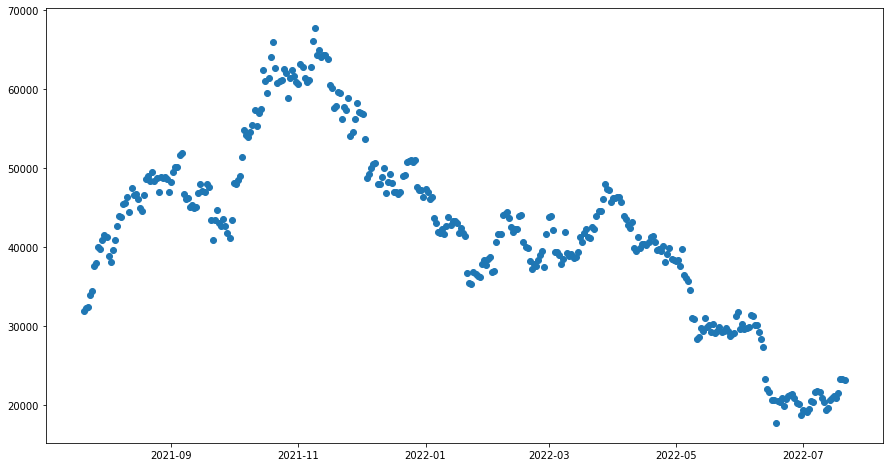

In [9]:
# importing matplotlib module
import matplotlib.pyplot as plt

# setting the size
plt.figure(figsize=(15, 8))

# plotting the scatter plot
plt.scatter(BTC.ds, BTC.y)
plt.show()

# Training the model with linear growth

In [10]:
# importing python time series packages
from prophet import Prophet

# initialiazing the model with 80% confidence interval
model = Prophet(interval_width=0.8)

# business forecast tasks training
model.fit(BTC)

00:17:24 - cmdstanpy - INFO - Chain [1] start processing
00:17:24 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# historical data and future data
future = model.make_future_dataframe(periods=2, freq='d')
future

,ds
0,2021-07-21
1,2021-07-22
2,2021-07-23
3,2021-07-24
4,2021-07-25
...,...
363,2022-07-19
364,2022-07-20
365,2022-07-21
366,2022-07-22


In [12]:
# forecast predictions
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-21,37649.433570,33543.348208,42128.618319,37649.433570,37649.433570,142.075004,142.075004,142.075004,142.075004,142.075004,142.075004,0.0,0.0,0.0,37791.508574
1,2021-07-22,37866.063746,33416.552596,41866.588986,37866.063746,37866.063746,-69.750901,-69.750901,-69.750901,-69.750901,-69.750901,-69.750901,0.0,0.0,0.0,37796.312846
2,2021-07-23,38082.693923,33658.072227,42438.664624,38082.693923,38082.693923,-144.764719,-144.764719,-144.764719,-144.764719,-144.764719,-144.764719,0.0,0.0,0.0,37937.929204
3,2021-07-24,38299.324099,33680.547203,42794.047008,38299.324099,38299.324099,-114.601024,-114.601024,-114.601024,-114.601024,-114.601024,-114.601024,0.0,0.0,0.0,38184.723075
4,2021-07-25,38515.954276,34600.505892,42807.572299,38515.954276,38515.954276,0.544022,0.544022,0.544022,0.544022,0.544022,0.544022,0.0,0.0,0.0,38516.498298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2022-07-19,17847.187241,13512.464601,21934.870993,17847.187241,17847.187241,123.855315,123.855315,123.855315,123.855315,123.855315,123.855315,0.0,0.0,0.0,17971.042556
364,2022-07-20,17616.232236,13631.892332,22156.606220,17616.232236,17616.232236,142.075004,142.075004,142.075004,142.075004,142.075004,142.075004,0.0,0.0,0.0,17758.307239
365,2022-07-21,17385.277231,12724.483180,21825.816555,17385.277231,17385.277231,-69.750901,-69.750901,-69.750901,-69.750901,-69.750901,-69.750901,0.0,0.0,0.0,17315.526330
366,2022-07-22,17154.322226,12420.981375,21272.883776,17154.322226,17154.322226,-144.764719,-144.764719,-144.764719,-144.764719,-144.764719,-144.764719,0.0,0.0,0.0,17009.557507


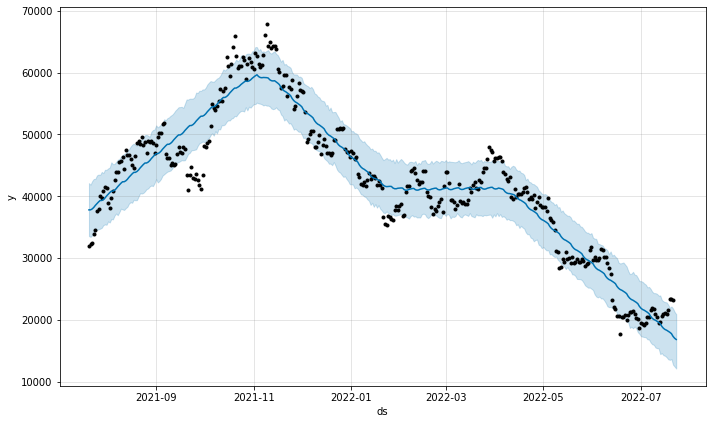

In [13]:
# visualizing time series analysis
fig1 = model.plot(forecast)

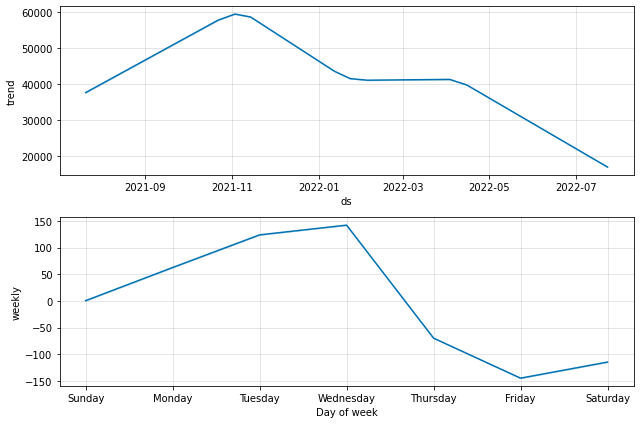

In [14]:
# weekly and monthly time series analysis
fig2 = model.plot_components(forecast)

# Training the model with logistic growth


In [15]:
#  fix the carrying capacity to 80000 USD dollars.

BTC['cap'] = 80000

In [16]:
# confidence interval of 50%
model_logistic = Prophet(growth='logistic', interval_width=0.5)

# fitting the model
model_logistic.fit(BTC)

00:17:27 - cmdstanpy - INFO - Chain [1] start processing
00:17:27 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
# forecasting for future
future = model_logistic.make_future_dataframe(periods=2, freq='M')

# carrying capacity
future['cap'] = 80000

# predictions 
forecast_logistic = model_logistic.predict(future)

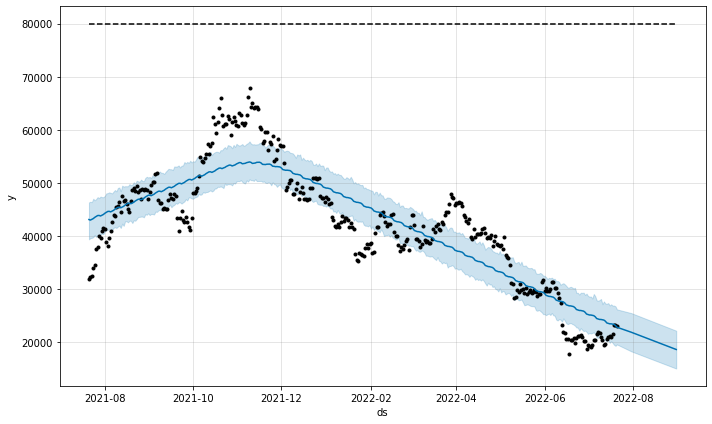

In [18]:
# visualizing the forecat predictions
fig1 = model.plot(forecast_logistic)

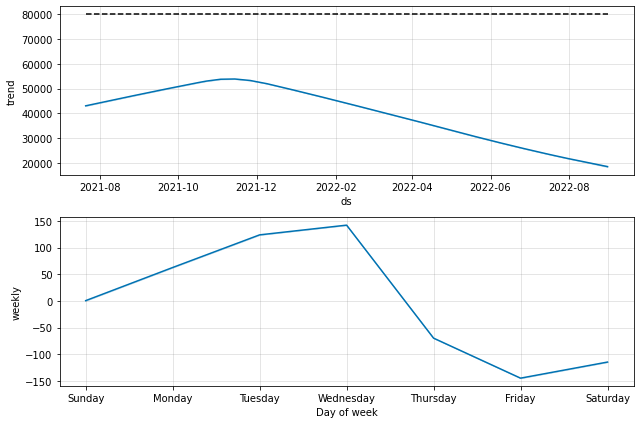

In [19]:
# weekly weekly observations and monthly time series analysis
fig2 = model.plot_components(forecast_logistic)